**Sahar Sarkar  400722084**

In [ ]:
!gdown --id 1-XHyuLpBuwFOQlGTs-egxp6JsxiW4Cfj
!gdown --id 1FJK4Oaasdw9QjpgRz71wr1T4__Va_IBa
!gdown --id 1j4aaNvxtBxUZzab6e2qGcUJBYGw1KjhG
!gdown --id 1P_TizbVccxhtByZEhWABlStGxT2pJ_7H

Downloading...
From: https://drive.google.com/uc?id=1-XHyuLpBuwFOQlGTs-egxp6JsxiW4Cfj
To: /content/t10k-images-idx3-ubyte.gz
100% 1.65M/1.65M [00:00<00:00, 51.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FJK4Oaasdw9QjpgRz71wr1T4__Va_IBa
To: /content/t10k-labels-idx1-ubyte.gz
100% 4.54k/4.54k [00:00<00:00, 8.05MB/s]
Downloading...
From: https://drive.google.com/uc?id=1j4aaNvxtBxUZzab6e2qGcUJBYGw1KjhG
To: /content/train-images-idx3-ubyte.gz
100% 9.91M/9.91M [00:00<00:00, 46.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1P_TizbVccxhtByZEhWABlStGxT2pJ_7H
To: /content/train-labels-idx1-ubyte.gz
100% 28.9k/28.9k [00:00<00:00, 49.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-XHyuLpBuwFOQlGTs-egxp6JsxiW4Cfj
To: /content/t10k-images-idx3-ubyte.gz
100% 1.65M/1.65M [00:00<00:00, 52.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FJK4Oaasdw9QjpgRz71wr1T4__Va_IBa
To: /content/t10k-labels-idx1-ubyte.gz
100% 4.54k/4.54k [00:00<00:00, 7.48MB/s]
Do

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import gzip
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# **Preprocassing**

In [ ]:
def images(files):
    with gzip.open(files, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images

def labels(files):
    with gzip.open(files, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

In [ ]:
train_images = images('train-images-idx3-ubyte.gz')
test_images = images('t10k-images-idx3-ubyte.gz')
train_labels = labels('train-labels-idx1-ubyte.gz')
test_labels = labels('t10k-labels-idx1-ubyte.gz')

In [ ]:
print('train_images shape:', train_images.shape)
print('test_images shape:',test_images.shape)
print('train_labels shape:',train_labels.shape)
print('test_labels shape:',test_labels.shape)

train_images shape: (60000, 28, 28)
test_images shape: (10000, 28, 28)
train_labels shape: (60000,)
test_labels shape: (10000,)


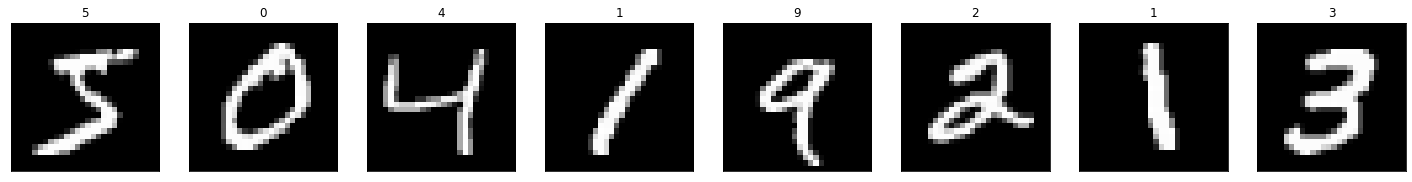

In [ ]:
plt.figure(figsize=(25,4))
for i in range(8):
  plt.subplot(1,8,i+1)
  plt.imshow(train_images[i], cmap = 'gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(train_labels[i])

In [ ]:
def imgtodf(img):
  train_df = pd.DataFrame(np.zeros((784)))
  train_df = train_df.T
  for i in img:
    array_1d = i.flatten()
    df = pd.DataFrame(array_1d)
    df = df.T
    train_df = train_df.append(df)
  train_df = train_df.iloc[1:,:]
  return train_df

In [ ]:
X_train = imgtodf(train_images)
X_test = imgtodf(test_images)

In [ ]:
X_train.to_csv('/content/drive/MyDrive/University/Pattern Recognition/Project/Data/train_data.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/University/Pattern Recognition/Project/Data/test_data.csv', index=False)

In [ ]:
#Load CSV
X_train= pd.read_csv('/content/drive/MyDrive/University/Pattern Recognition/Project/Data/train_data.csv')
X_test= pd.read_csv('/content/drive/MyDrive/University/Pattern Recognition/Project/Data/test_data.csv')

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
y_train = pd.DataFrame(train_labels)
y_test = pd.DataFrame(test_labels)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000, 1)
(10000, 1)


# **Algorithms**

## **SVM**

### kenel = 'rbf'

In [ ]:
%%time
classifier_rbf = OneVsRestClassifier(SVC(kernel='rbf', random_state=1))
classifier_rbf.fit(X_train,y_train)
y_pred_rbf = classifier_rbf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rbf))

Accuracy: 0.98
CPU times: user 34min 48s, sys: 2.9 s, total: 34min 51s
Wall time: 34min 50s


In [ ]:
y_pred_rbf_decision_function = classifier_rbf.fit(X_train,y_train).decision_function(X_test)

Confusion Matrix

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_rbf)
print(cm_svm)

[[ 970    0    1    0    0    1    4    1    3    0]
 [   0 1126    3    1    0    1    2    1    1    0]
 [   5    1 1006    2    2    0    2    6    7    1]
 [   1    0    3  989    0    2    0    6    4    5]
 [   1    0    4    0  962    0    3    0    2   10]
 [   2    0    0    6    0  877    3    1    2    1]
 [   5    2    0    0    2    2  945    0    2    0]
 [   1    6   14    1    0    1    0  993    3    9]
 [   2    0    1    3    2    1    2    3  959    1]
 [   4    3    1    7    9    2    1    5    4  973]]


Precision

In [ ]:
precision_svm = precision_score(y_test, y_pred_rbf, average='weighted')
print('Precision: ',precision_svm)

Precision:  0.9800062739644291


Recall

In [ ]:
recall_svm = recall_score(y_test, y_pred_rbf, average='weighted')
print('Recall: ',recall_svm)

Recall:  0.98


F1_score

In [ ]:
f1score_svm = f1_score(y_test,y_pred_rbf, average= 'weighted')
print(f1score_svm)

0.97998856542316


ROC & AUC

In [ ]:
y_test_b = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

roc_auc_score for SVM 0 : 0.9997192180641657
roc_auc_score for SVM 1 : 0.9999179071287124
roc_auc_score for SVM 2 : 0.9993911383454696
roc_auc_score for SVM 3 : 0.9990792850141522
roc_auc_score for SVM 4 : 0.999716565962892
roc_auc_score for SVM 5 : 0.9996879745003161
roc_auc_score for SVM 6 : 0.9995524250320588
roc_auc_score for SVM 7 : 0.9986855994698596
roc_auc_score for SVM 8 : 0.999358572155912
roc_auc_score for SVM 9 : 0.9979380327359625


Number: 0


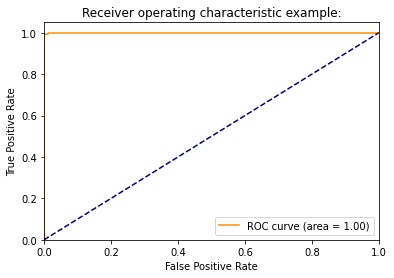



Number: 1


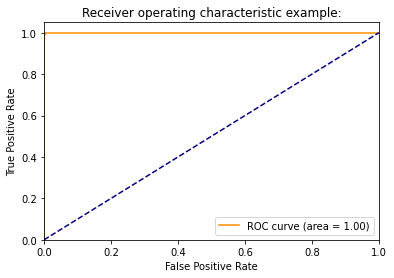



Number: 2


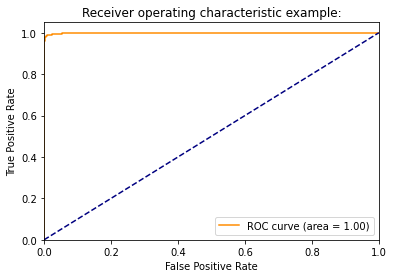



Number: 3


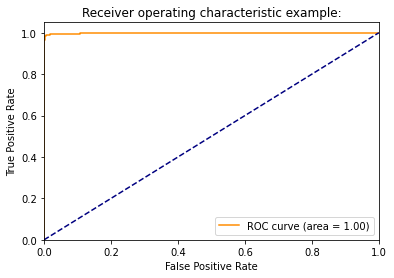



Number: 4


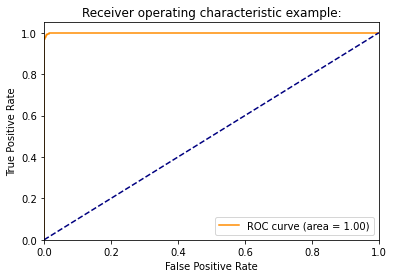



Number: 5


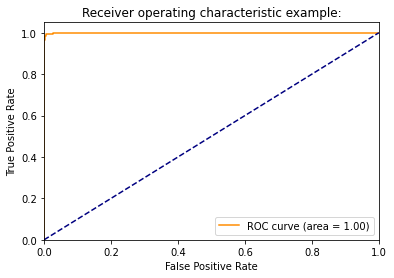



Number: 6


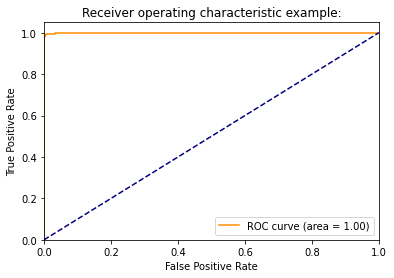



Number: 7


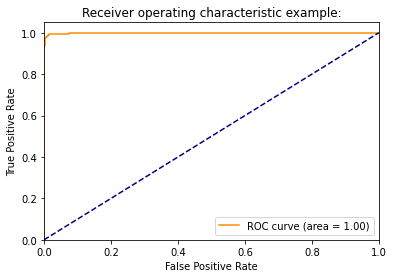



Number: 8


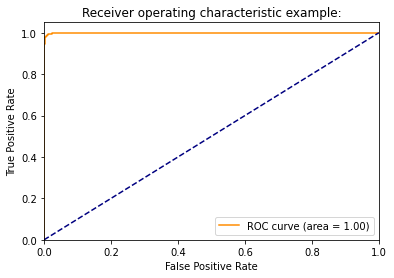



Number: 9


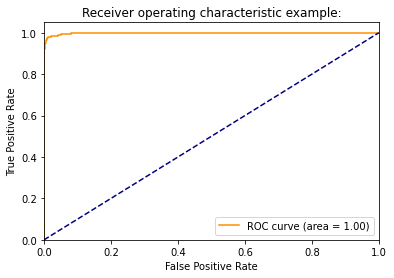

In [ ]:
n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_pred_rbf_decision_function[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
  print('roc_auc_score for SVM',i,":", roc_auc_score(y_test_b[:, i], y_pred_rbf_decision_function[:, i]))
for i in range(n_classes):
  plt.figure()
  plt.plot(fpr[i], tpr[i],color="darkorange", label='ROC curve (area = %0.2f)' % roc_auc[i])
  plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  print("\n")
  print('Number:',i)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example:')
  plt.legend(loc="lower right")
  plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  # This is added back by InteractiveShellApp.init_path()


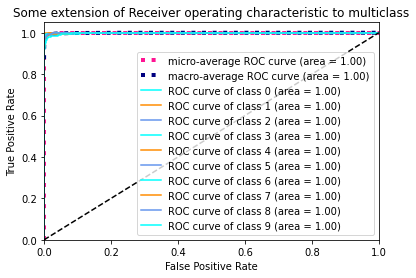

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_b.ravel(), y_pred_rbf_decision_function.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
n_classes = 10
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

### **kenel = 'linear'**

In [ ]:
%%time
clf_linear = OneVsRestClassifier(make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5)))
clf_linear.fit(X_train, y_train)
y_pred_linear = clf_linear.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_linear))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Accuracy: 0.9137
CPU times: user 10min 13s, sys: 1.02 s, total: 10min 14s
Wall time: 10min 12s


In [ ]:
y_pred_linear_decision_function = clf_linear.fit(X_train,y_train).decision_function(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Confusion Matrix

In [ ]:
cm_svm_linear = confusion_matrix(y_test, y_pred_linear)
print(cm_svm_linear)

[[ 952    0    2    1    0   13    7    3    1    1]
 [   0 1115    4    3    0    1    4    2    6    0]
 [   6   12  903   30   10    7   11   15   35    3]
 [   4    4   18  913    3   23    4   11   19   11]
 [   1    3    7    8  905    0    7    3    6   42]
 [  11    1    0   31   15  775   19    6   27    7]
 [   9    5    9    3    6   16  909    0    1    0]
 [   5   10   19    9    8    2    1  934    4   36]
 [   9   12    8   22   14   32   14   13  837   13]
 [  10   10    3   20   29    8    0   25   10  894]]


Precision

In [ ]:
precision_linear = precision_score(y_test, y_pred_linear, average='weighted')
print('Precision: ',precision_linear)

Precision:  0.9135187116928976


Recall

In [ ]:
recall_linear = recall_score(y_test, y_pred_linear, average='weighted')
print('Recall: ',recall_linear)

Recall:  0.9137


F1_score

In [ ]:
f1score_linear = f1_score(y_test,y_pred_linear, average= 'weighted')
print(f1score_linear)

0.913425104678827


ROC & AUC

roc_auc_score for SVM 0 : 0.9965700936693969
roc_auc_score for SVM 1 : 0.9966505909742566
roc_auc_score for SVM 2 : 0.9783012943523569
roc_auc_score for SVM 3 : 0.9830921045385962
roc_auc_score for SVM 4 : 0.9895661268546863
roc_auc_score for SVM 5 : 0.9715001939850839
roc_auc_score for SVM 6 : 0.9931576558292802
roc_auc_score for SVM 7 : 0.9879088812405563
roc_auc_score for SVM 8 : 0.9599656434002433
roc_auc_score for SVM 9 : 0.9719408870383432


Number: 0


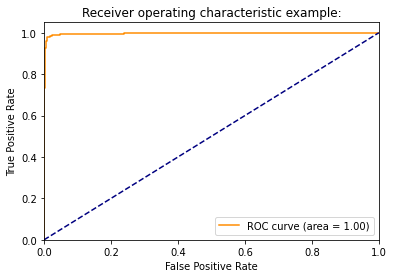



Number: 1


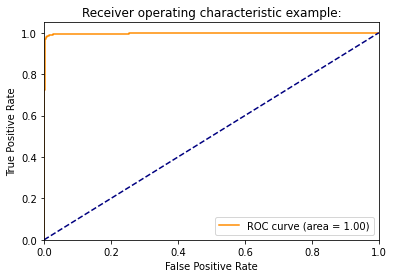



Number: 2


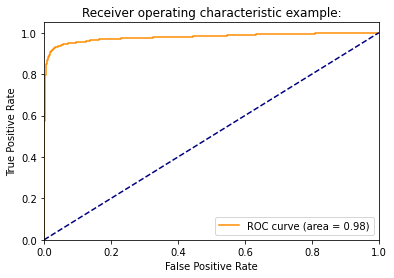



Number: 3


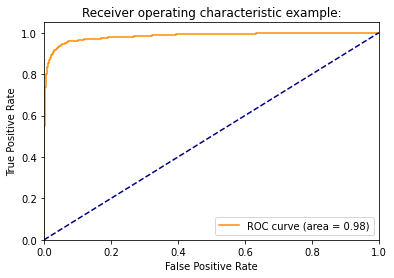



Number: 4


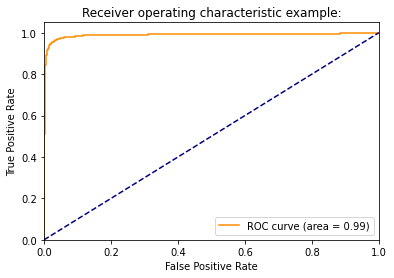



Number: 5


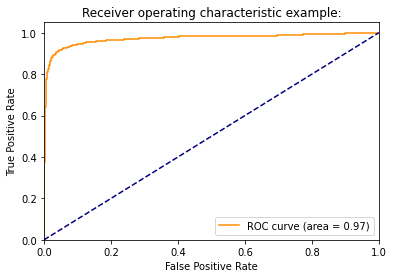



Number: 6


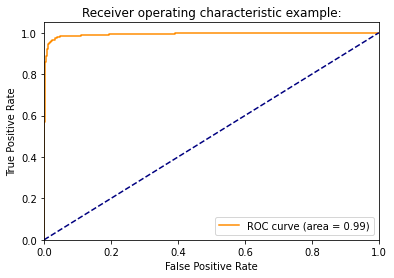



Number: 7


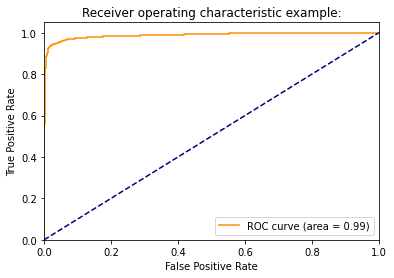



Number: 8


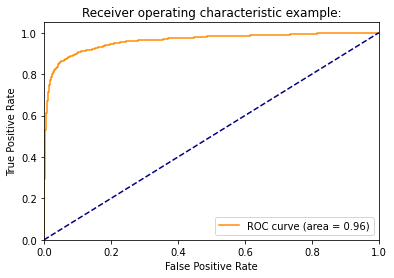



Number: 9


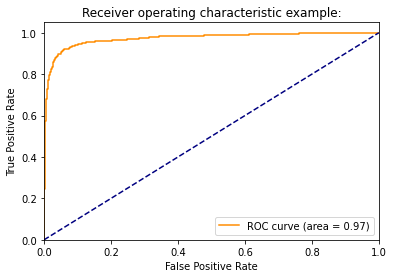

In [ ]:
n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_pred_linear_decision_function[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
  print('roc_auc_score for SVM',i,":", roc_auc_score(y_test_b[:, i], y_pred_linear_decision_function[:, i]))
for i in range(n_classes):
  plt.figure()
  plt.plot(fpr[i], tpr[i],color="darkorange", label='ROC curve (area = %0.2f)' % roc_auc[i])
  plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  print("\n")
  print('Number:',i)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example:')
  plt.legend(loc="lower right")
  plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  # This is added back by InteractiveShellApp.init_path()


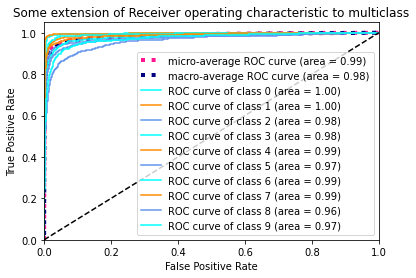

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_b.ravel(), y_pred_linear_decision_function.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
n_classes = 10
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

## **Decision Tree**

In [ ]:
%%time
clf = OneVsRestClassifier(DecisionTreeClassifier())
clf.fit(X_train,y_train)
y_pred_tree = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_tree))

Accuracy: 0.8528
CPU times: user 3min 7s, sys: 337 ms, total: 3min 7s
Wall time: 3min 25s


In [ ]:
y_pred_tree_pr = clf.fit(X_train,y_train).predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:502: RuntimeWarning: invalid value encountered in true_divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


Confusion Matrix

In [ ]:
cm_tree = confusion_matrix(y_test,y_pred_tree)
print(cm_tree)

[[ 856    0   12   16    4    4    8    6   15   59]
 [   1 1074    8    7    1    0    7    1    5   31]
 [   6    2  810   37   11    6    5    9   29  117]
 [   1    1    8  788    3   35    0   20   26  128]
 [   0    1    3    2  777    5    9   21   23  141]
 [   0    3    1   11    3  721   11    8   29  105]
 [   3    1    1    0    4    7  872    1   23   46]
 [   1    3   11    4    3    1    0  883   14  108]
 [   2    2    8   12    6    6    7    5  778  148]
 [   1    1    4    6    6    3    0   13    6  969]]


Precision

In [ ]:
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
print('Precision: ',precision_tree)

Precision:  0.8874028558461294


Recall

In [ ]:
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
print('Recall: ',recall_tree)

Recall:  0.8528


F1_score

In [ ]:
f1score_tree = f1_score(y_test,y_pred_tree, average= 'weighted')
print(f1score_tree)

0.8610374233206342


ROC

In [ ]:
y_test_tree_b = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_test_tree_b.shape[1]

roc_auc_score for Decision Tree:  0 0.9690379655188017
roc_auc_score for Decision Tree:  1 0.9797282785592006
roc_auc_score for Decision Tree:  2 0.9246935918580449
roc_auc_score for Decision Tree:  3 0.915655899294045
roc_auc_score for Decision Tree:  4 0.935018568881698
roc_auc_score for Decision Tree:  5 0.9256049971345351
roc_auc_score for Decision Tree:  6 0.95756361290549
roc_auc_score for Decision Tree:  7 0.9458061049421372
roc_auc_score for Decision Tree:  8 0.9023870010933507
roc_auc_score for Decision Tree:  9 0.9073646931812333


Number: 0


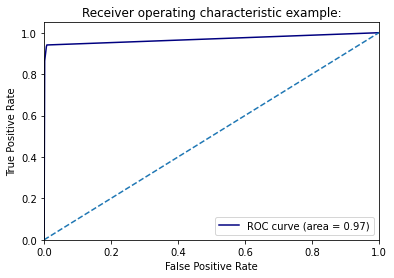



Number: 1


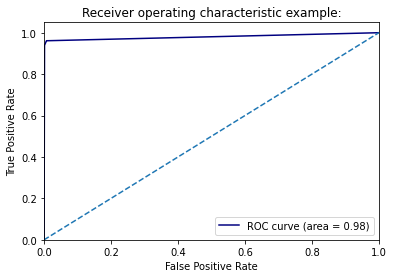



Number: 2


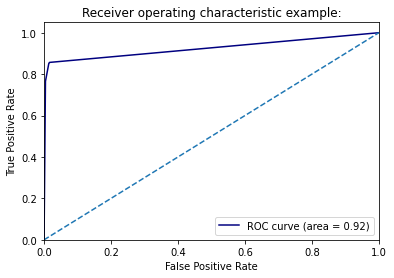



Number: 3


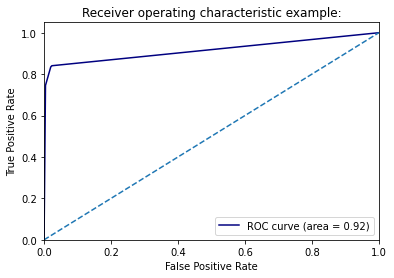



Number: 4


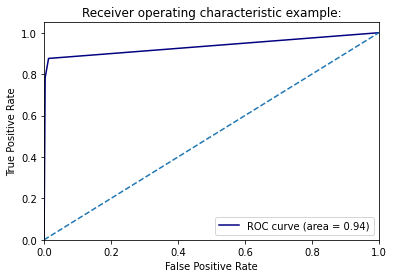



Number: 5


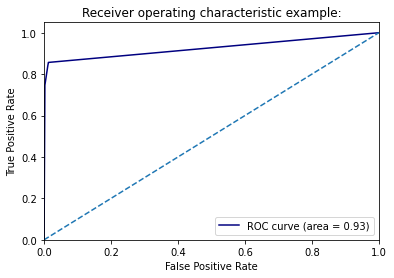



Number: 6


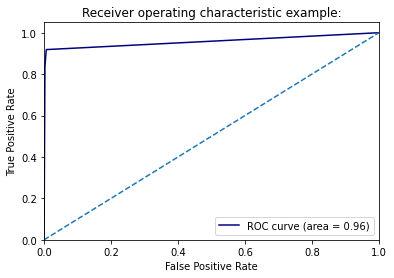



Number: 7


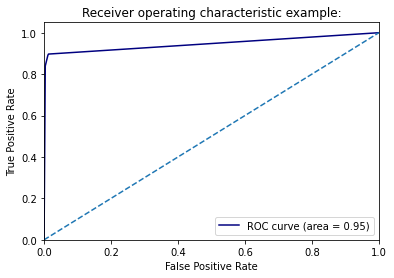



Number: 8


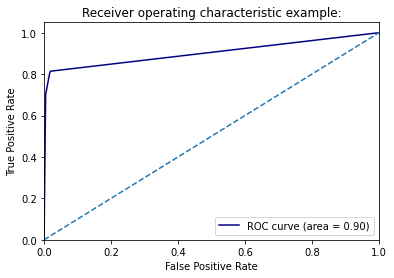



Number: 9


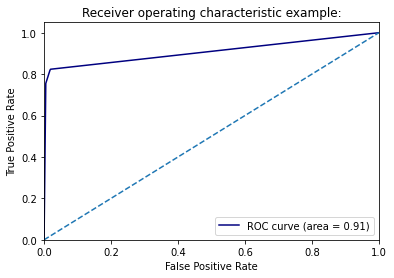

In [ ]:
n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_tree_b[:, i], y_pred_tree_pr[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
  print('roc_auc_score for Decision Tree: ',i, roc_auc_score(y_test_tree_b[:, i], y_pred_tree_pr[:, i]))
for i in range(n_classes):
  plt.figure()
  plt.plot(fpr[i], tpr[i],color="navy", label='ROC curve (area = %0.2f)' % roc_auc[i])
  plt.plot([0, 1], [0, 1], linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  print("\n")
  print('Number:',i)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example:')
  plt.legend(loc="lower right")
  plt.show()


In [ ]:
df = pd.DataFrame(y_pred_tree_pr)
df.isna().sum()

0    859
1    859
2    859
3    859
4    859
5    859
6    859
7    859
8    859
9    859
dtype: int64

In [ ]:
df = df.fillna(0)

In [ ]:
y_pred_tree_pr = df.to_numpy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  # This is added back by InteractiveShellApp.init_path()


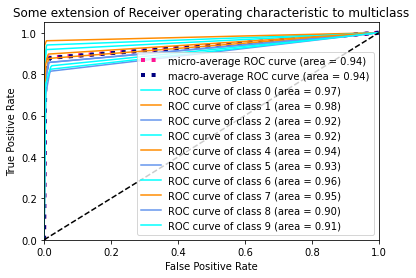

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_b.ravel(), y_pred_tree_pr.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
n_classes = 10
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_tree_b.ravel(), y_pred_tree_pr.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
n_classes = 10
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

# **PCA**

In [ ]:
pca_40 = PCA(n_components=40)
pca_100 = PCA(n_components=100)
#PCA 40
X_train_pca40 = pca_40.fit(X_train)
X_test_pca40 = pca_40.fit(X_test)
#PCA 100
X_train_pca100 = pca_100.fit(X_train)
X_test_pca100 = pca_100.fit(X_test)

In [ ]:
#PCA 40
X_train_pca40 = X_train_pca40.transform(X_train)
X_test_pca40 = X_test_pca40.transform(X_test)
#PCA 100
X_train_pca100 = X_train_pca100.transform(X_train)
X_test_pca100 = X_test_pca100.transform(X_test)

In [ ]:
print(X_train_pca40.shape)
print(X_test_pca40.shape)
print(X_train_pca100.shape)
print(X_test_pca100.shape)

(60000, 40)
(10000, 40)
(60000, 100)
(10000, 100)


## **PCA 40**

### **SVM --> kernel = 'rbf'**

In [ ]:
%%time
classifier_rbf40 = OneVsRestClassifier(SVC(kernel='rbf', random_state=1))
classifier_rbf40.fit(X_train_pca40,y_train)
y_pred_rbf40 = classifier_rbf40.predict(X_test_pca40)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rbf40))

Accuracy: 0.9836
CPU times: user 2min 57s, sys: 423 ms, total: 2min 57s
Wall time: 3min 20s


In [ ]:
y_pred_rbf_decision_function40 = classifier_rbf40.fit(X_train_pca40,y_train).decision_function(X_test_pca40)

Confusion Matrix

In [ ]:
cm_svm40 = confusion_matrix(y_test, y_pred_rbf40)
print(cm_svm40)

[[ 972    0    1    0    0    1    3    1    2    0]
 [   0 1128    2    1    0    1    2    0    1    0]
 [   4    0 1013    2    2    0    1    7    3    0]
 [   0    0    2  991    0    4    0    6    3    4]
 [   0    0    1    0  966    0    4    0    2    9]
 [   2    0    0    7    0  878    2    1    1    1]
 [   5    2    0    0    2    1  945    0    3    0]
 [   1    8   10    0    2    1    0  997    2    7]
 [   2    0    2    2    0    1    0    2  963    2]
 [   3    3    0    4    8    3    1    3    1  983]]


Precision

In [ ]:
precision_svm40 = precision_score(y_test, y_pred_rbf40, average='weighted')
print('Precision: ',precision_svm40)

Precision:  0.9835945929352012


Recall

In [ ]:
recall_svm40 = recall_score(y_test, y_pred_rbf40, average='weighted')
print('Recall: ',recall_svm40)

Recall:  0.9836


F1_score

In [ ]:
f1score_svm40 = f1_score(y_test, y_pred_rbf40, average= 'weighted')
print(f1score_svm40)

0.9835896898411677


ROC

roc_auc_score for SVM 0 : 0.9998311009547943
roc_auc_score for SVM 1 : 0.9998950483388865
roc_auc_score for SVM 2 : 0.999646352405452
roc_auc_score for SVM 3 : 0.99967169241952
roc_auc_score for SVM 4 : 0.9998192119946575
roc_auc_score for SVM 5 : 0.9997972757404421
roc_auc_score for SVM 6 : 0.9996767578255776
roc_auc_score for SVM 7 : 0.9990411153766755
roc_auc_score for SVM 8 : 0.9995486459149953
roc_auc_score for SVM 9 : 0.9987764441018487


Number: 0


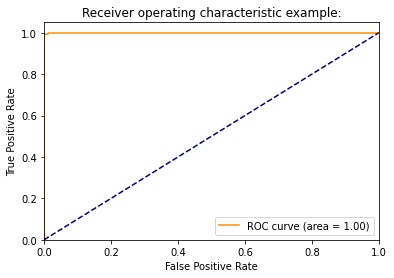



Number: 1


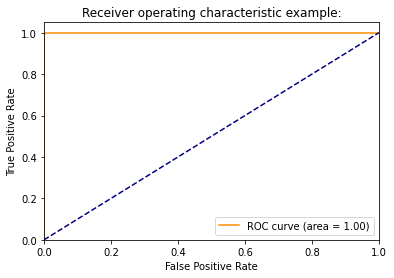



Number: 2


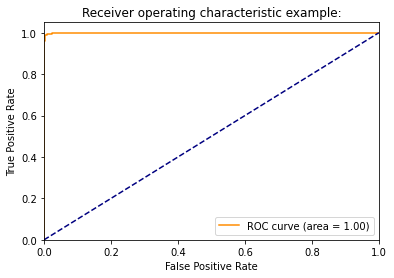



Number: 3


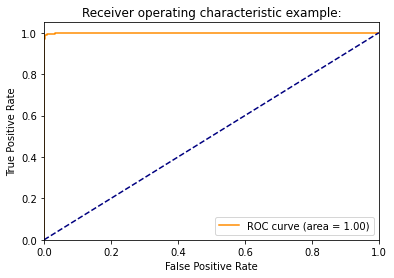



Number: 4


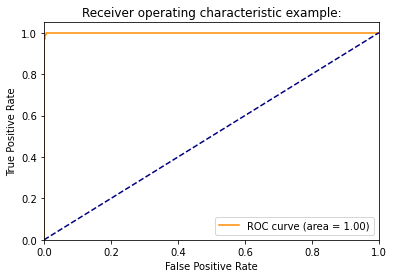



Number: 5


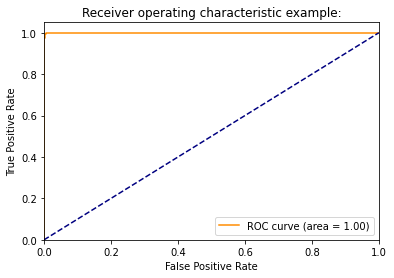



Number: 6


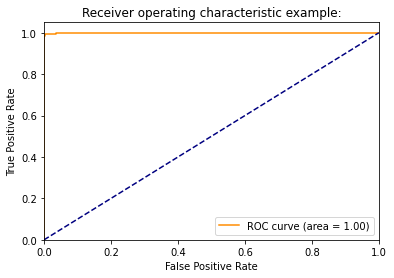



Number: 7


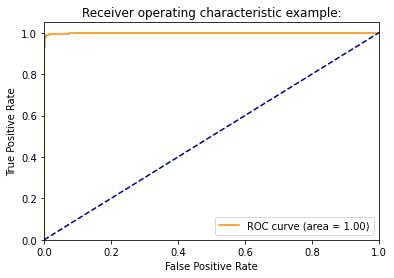



Number: 8


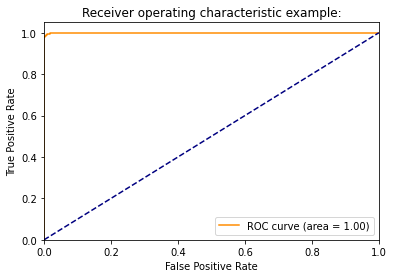



Number: 9


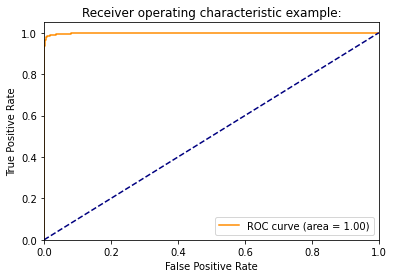

In [ ]:
n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_pred_rbf_decision_function40[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
  print('roc_auc_score for SVM',i,":", roc_auc_score(y_test_b[:, i], y_pred_rbf_decision_function40[:, i]))
for i in range(n_classes):
  plt.figure()
  plt.plot(fpr[i], tpr[i],color="darkorange", label='ROC curve (area = %0.2f)' % roc_auc[i])
  plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  print("\n")
  print('Number:',i)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example:')
  plt.legend(loc="lower right")
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  # This is added back by InteractiveShellApp.init_path()


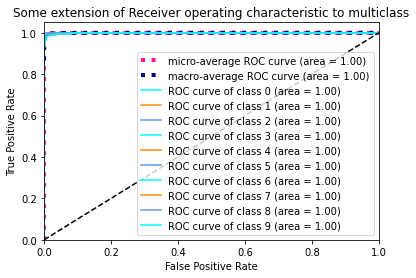

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_b.ravel(), y_pred_rbf_decision_function40.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
n_classes = 10
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()


### **SVM --> kernel = 'linear'**

In [ ]:
%%time
clf_linear40 = OneVsRestClassifier(make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5)))
clf_linear40.fit(X_train_pca40, y_train)
y_pred_linear40 = clf_linear40.predict(X_test_pca40)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_linear40))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Accuracy: 0.8958
CPU times: user 30.4 s, sys: 88.9 ms, total: 30.5 s
Wall time: 30.7 s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
y_pred_linear_decision_function40 = clf_linear.fit(X_train_pca40,y_train).decision_function(X_test_pca40)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Confusion Matrix

In [ ]:
cm_svm_linear40 = confusion_matrix(y_test, y_pred_linear40)
print(cm_svm_linear40)

[[ 958    0    2    2    1    6    7    2    2    0]
 [   0 1110    1    3    0    1    4    1   15    0]
 [  10    9  887   18   16    1   18   19   46    8]
 [   3    1   23  902    1   31    5   11   17   16]
 [   3    2    9    1  896    2    8    1    9   51]
 [  15    3    6   62   24  694   22   11   37   18]
 [  14    3    6    2   13   12  903    0    5    0]
 [   5   15   26    4   11    1    1  936    3   26]
 [  15   11   14   29   13   36   14   14  819    9]
 [  10   10    5   13   48   19    1   34   16  853]]


Precision

In [ ]:
precision_linear40 = precision_score(y_test, y_pred_linear40, average='weighted')
print('Precision: ',precision_linear40)

Precision:  0.8952282261672126


Recall

In [ ]:
recall_linear40 = recall_score(y_test, y_pred_linear40, average='weighted')
print('Recall: ',recall_linear40)

Recall:  0.8958


F1_score

In [ ]:
f1score_linear40 = f1_score(y_test,y_pred_linear40, average= 'weighted')
print(f1score_linear40)

0.8950831636019188


ROC & AUC

roc_auc_score for SVM 0 : 0.9981932440381918
roc_auc_score for SVM 1 : 0.9980885082403452
roc_auc_score for SVM 2 : 0.9717014933372059
roc_auc_score for SVM 3 : 0.9810015528805383
roc_auc_score for SVM 4 : 0.9900534978921993
roc_auc_score for SVM 5 : 0.9531031212889274
roc_auc_score for SVM 6 : 0.9939057305758005
roc_auc_score for SVM 7 : 0.9875414389080772
roc_auc_score for SVM 8 : 0.9635744286071132
roc_auc_score for SVM 9 : 0.9671533663384781


Number: 0


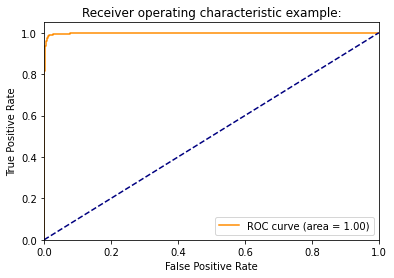



Number: 1


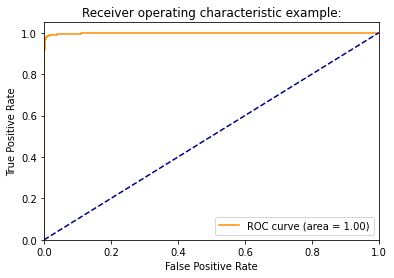



Number: 2


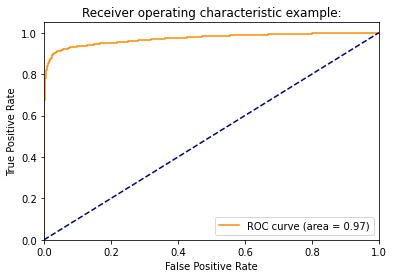



Number: 3


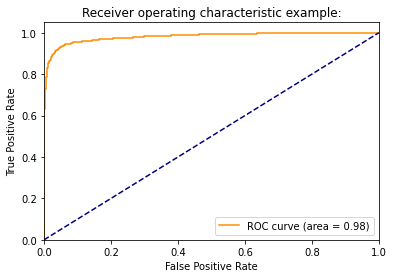



Number: 4


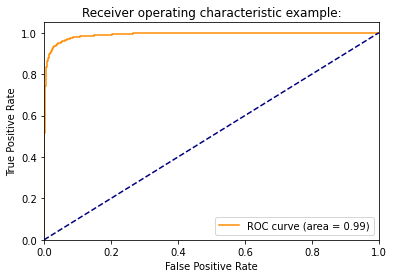



Number: 5


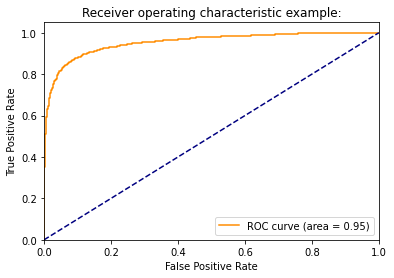



Number: 6


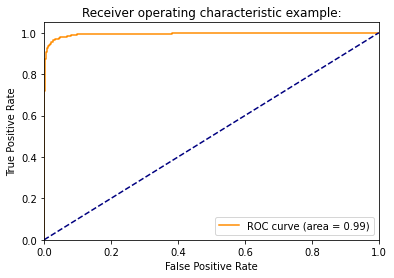



Number: 7


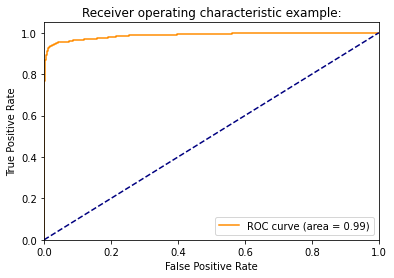



Number: 8


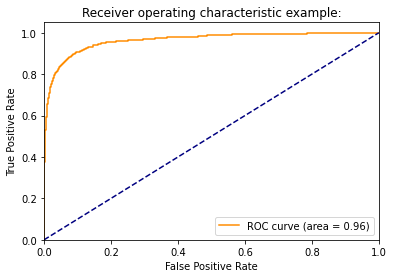



Number: 9


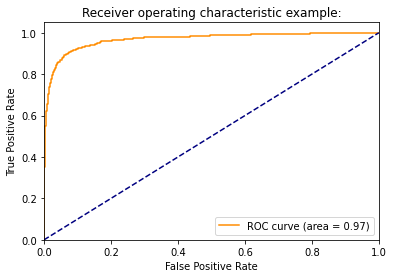

In [ ]:
n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_pred_linear_decision_function40[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
  print('roc_auc_score for SVM',i,":", roc_auc_score(y_test_b[:, i], y_pred_linear_decision_function40[:, i]))
for i in range(n_classes):
  plt.figure()
  plt.plot(fpr[i], tpr[i],color="darkorange", label='ROC curve (area = %0.2f)' % roc_auc[i])
  plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  print("\n")
  print('Number:',i)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example:')
  plt.legend(loc="lower right")
  plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  # This is added back by InteractiveShellApp.init_path()


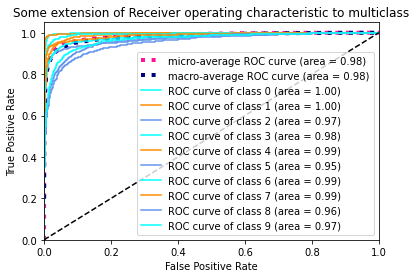

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_b.ravel(), y_pred_linear_decision_function40.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
n_classes = 10
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

### ***Decision Tree***

In [ ]:
%%time
clf40 = OneVsRestClassifier(DecisionTreeClassifier())
clf40.fit(X_train_pca40,y_train)
y_pred_tree40 = clf40.predict(X_test_pca40)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_tree40))

Accuracy: 0.7963
CPU times: user 1min 10s, sys: 149 ms, total: 1min 10s
Wall time: 1min 18s


In [ ]:
y_pred_tree_pr40 = clf40.fit(X_train_pca40,y_train).predict_proba(X_test_pca40)

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:502: RuntimeWarning: invalid value encountered in true_divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


Confusion Matrix

In [ ]:
cm_tree40 = confusion_matrix(y_test,y_pred_tree40)
print(cm_tree40)

[[ 806    0   13   18    5   18   23   11   12   74]
 [   0 1078    6    2    0    5    3    1    9   31]
 [   5    1  738   35   12   15    9   15   51  151]
 [   2    1    5  750    6   58   12    8   38  130]
 [   2    1    3    2  674    7   18   17   29  229]
 [   5    3    5   17    6  621   18    8   49  160]
 [   4    2    1    2    4    6  817   13   34   75]
 [   4    0    8    5   10    0    1  838   15  147]
 [   4    0    9   12    6   14    5    6  703  215]
 [   3    4    2    4   24    9    2   14    9  938]]


Precision

In [ ]:
precision_tree40 = precision_score(y_test, y_pred_tree40, average='weighted')
print('Precision: ',precision_tree40)

Precision:  0.849756523818969


Recall

In [ ]:
recall_tree40 = recall_score(y_test, y_pred_tree40, average='weighted')
print('Recall: ',recall_tree40)

Recall:  0.7963


F1_score

In [ ]:
f1score_tree40 = f1_score(y_test,y_pred_tree40, average= 'weighted')
print(f1score_tree40)

0.809085707203253


ROC

In [ ]:
df = pd.DataFrame(y_pred_tree_pr40)
df = df.fillna(0)
y_pred_tree_pr40 = df.to_numpy()

roc_auc_score for Decision Tree:  0 0.9488832639485949
roc_auc_score for Decision Tree:  1 0.9811879613686452
roc_auc_score for Decision Tree:  2 0.9059307123000643
roc_auc_score for Decision Tree:  3 0.9095108976971111
roc_auc_score for Decision Tree:  4 0.898011399694388
roc_auc_score for Decision Tree:  5 0.8834211189689841
roc_auc_score for Decision Tree:  6 0.9457263690345079
roc_auc_score for Decision Tree:  7 0.9292278311599772
roc_auc_score for Decision Tree:  8 0.8672828461333014
roc_auc_score for Decision Tree:  9 0.8882259089835347


Number: 0


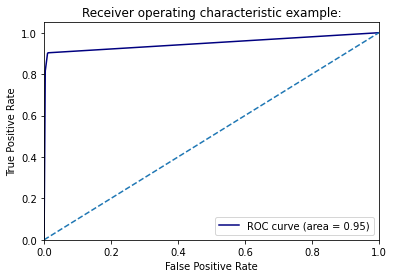



Number: 1


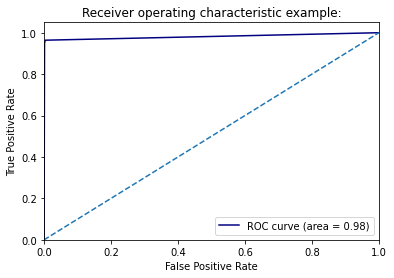



Number: 2


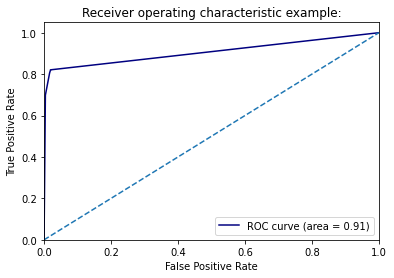



Number: 3


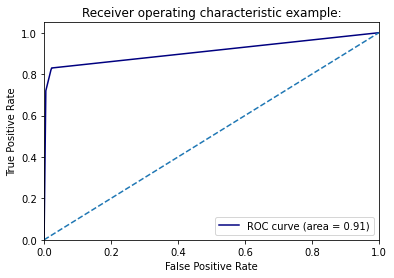



Number: 4


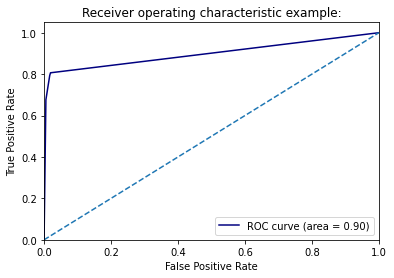



Number: 5


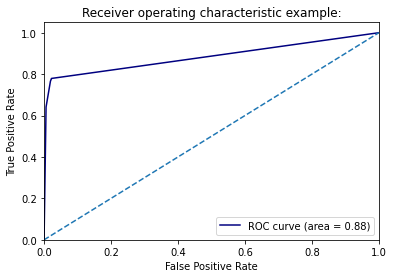



Number: 6


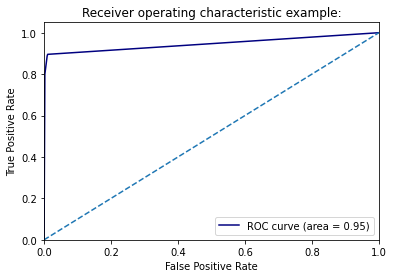



Number: 7


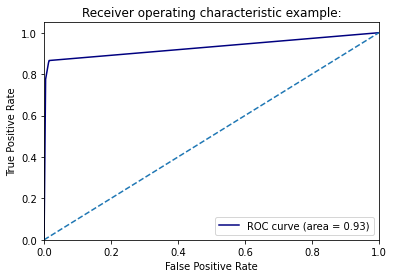



Number: 8


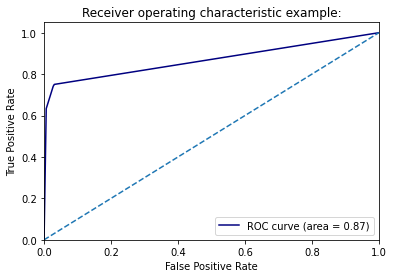



Number: 9


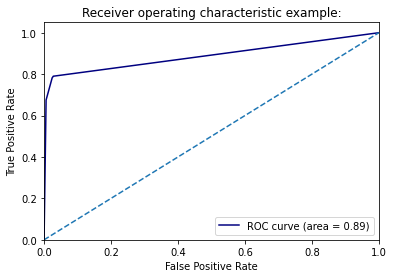

In [ ]:
n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_tree_b[:, i], y_pred_tree_pr40[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
  print('roc_auc_score for Decision Tree: ',i, roc_auc_score(y_test_tree_b[:, i], y_pred_tree_pr40[:, i]))
for i in range(n_classes):
  plt.figure()
  plt.plot(fpr[i], tpr[i],color="navy", label='ROC curve (area = %0.2f)' % roc_auc[i])
  plt.plot([0, 1], [0, 1], linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  print("\n")
  print('Number:',i)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example:')
  plt.legend(loc="lower right")
  plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  # This is added back by InteractiveShellApp.init_path()


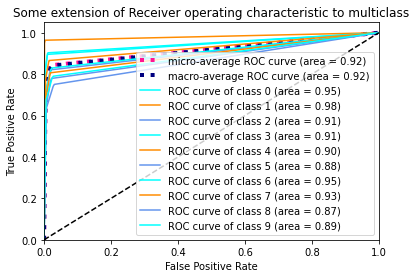

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_b.ravel(), y_pred_tree_pr40.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
n_classes = 10
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

## **PCA 100**

### **kernel = 'rbf'**

In [ ]:
%%time
classifier_rbf100 = OneVsRestClassifier(SVC(kernel='rbf', random_state=1))
classifier_rbf100.fit(X_train_pca100,y_train)
y_pred_rbf100 = classifier_rbf100.predict(X_test_pca100)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rbf100))

Accuracy: 0.9844
CPU times: user 6min 20s, sys: 719 ms, total: 6min 21s
Wall time: 6min 47s


In [ ]:
y_pred_rbf_decision_function100 = classifier_rbf100.fit(X_train_pca100,y_train).decision_function(X_test_pca100)

Confusion Matrix

In [ ]:
cm_svm100 = confusion_matrix(y_test, y_pred_rbf100)
print(cm_svm100)

[[ 973    1    0    0    0    2    1    1    1    1]
 [   0 1129    2    1    0    1    1    0    1    0]
 [   5    0 1012    2    2    0    0    6    5    0]
 [   1    0    2  991    0    3    0    6    4    3]
 [   0    0    3    0  964    0    3    0    2   10]
 [   2    0    0    5    0  880    3    1    0    1]
 [   4    2    0    0    1    2  947    0    2    0]
 [   0    4   10    0    1    1    0 1004    4    4]
 [   2    0    1    2    1    0    2    2  962    2]
 [   4    2    1    3    9    2    1    5    0  982]]


Precision

In [ ]:
precision_svm100 = precision_score(y_test, y_pred_rbf100, average='weighted')
print('Precision: ',precision_svm100)

Precision:  0.9844006290070391


Recall

In [ ]:
recall_svm100 = recall_score(y_test, y_pred_rbf100, average='weighted')
print('Recall: ',recall_svm100)

Recall:  0.9844


F1_score

In [ ]:
f1score_svm100 = f1_score(y_test, y_pred_rbf100, average= 'weighted')
print(f1score_svm100)

0.9843934488330542


ROC

roc_auc_score for SVM 0 : 0.9997937689488212
roc_auc_score for SVM 1 : 0.9999666062896457
roc_auc_score for SVM 2 : 0.9996873033490309
roc_auc_score for SVM 3 : 0.9995164043656868
roc_auc_score for SVM 4 : 0.9998119849913208
roc_auc_score for SVM 5 : 0.9998378944445429
roc_auc_score for SVM 6 : 0.9997291692352875
roc_auc_score for SVM 7 : 0.9991544164204763
roc_auc_score for SVM 8 : 0.9996793429522106
roc_auc_score for SVM 9 : 0.9986220115060551


Number: 0


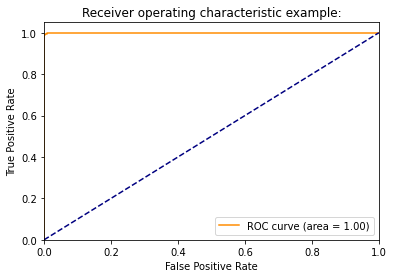



Number: 1


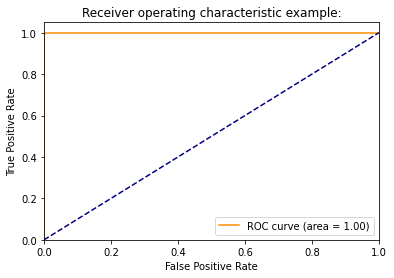



Number: 2


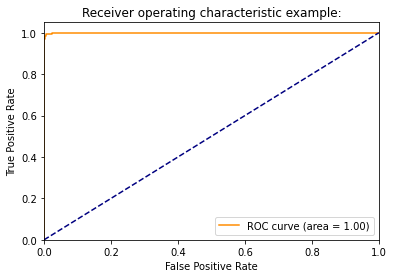



Number: 3


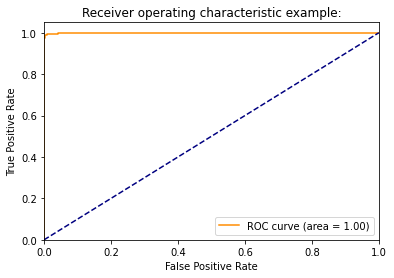



Number: 4


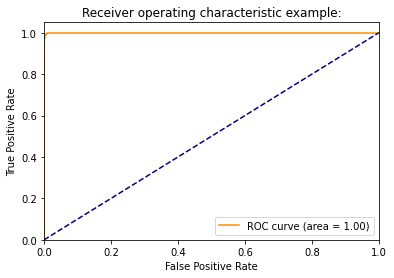



Number: 5


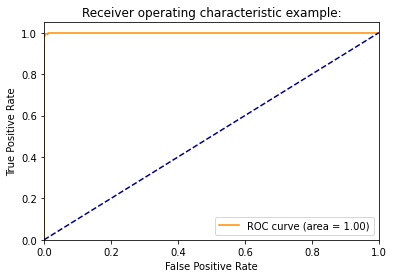



Number: 6


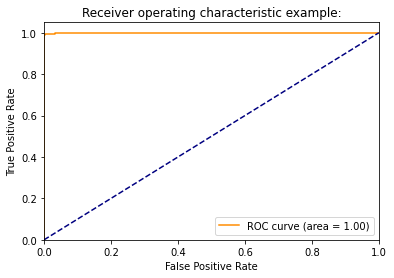



Number: 7


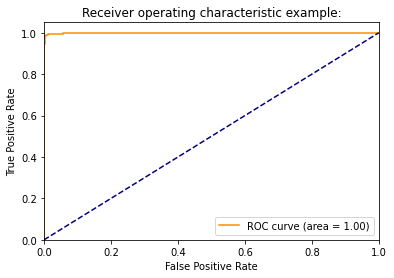



Number: 8


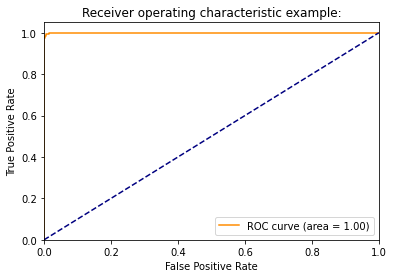



Number: 9


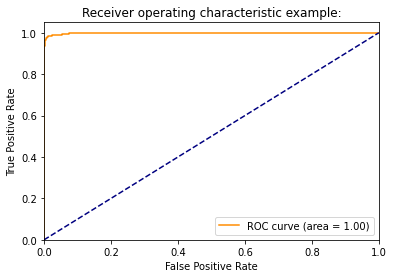

In [ ]:
n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_pred_rbf_decision_function100[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
  print('roc_auc_score for SVM',i,":", roc_auc_score(y_test_b[:, i], y_pred_rbf_decision_function100[:, i]))
for i in range(n_classes):
  plt.figure()
  plt.plot(fpr[i], tpr[i],color="darkorange", label='ROC curve (area = %0.2f)' % roc_auc[i])
  plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  print("\n")
  print('Number:',i)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example:')
  plt.legend(loc="lower right")
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


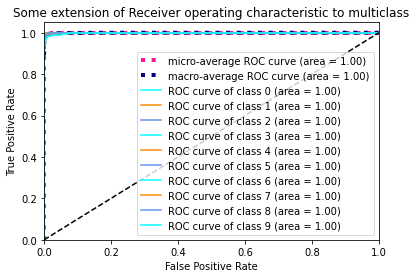

In [ ]:
n_classes = 10
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_b.ravel(), y_pred_rbf_decision_function100.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
n_classes = 10
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

### **kernel = 'linear'**

In [ ]:
%%time
clf_linear100 = OneVsRestClassifier(make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5)))
clf_linear100.fit(X_train_pca100, y_train)
y_pred_linear100 = clf_linear100.predict(X_test_pca100)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_linear100))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Accuracy: 0.9121
CPU times: user 1min 19s, sys: 180 ms, total: 1min 19s
Wall time: 1min 19s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
y_pred_linear_decision_function100 = clf_linear.fit(X_train_pca100,y_train).decision_function(X_test_pca100)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Confusion Matrix

In [ ]:
cm_svm_linear100 = confusion_matrix(y_test, y_pred_linear100)
print(cm_svm_linear100)

[[ 960    0    2    1    1    3    8    2    1    2]
 [   0 1110    1    3    0    1    4    2   14    0]
 [   5    7  915   16    8    4   16   15   39    7]
 [   6    2   21  909    1   24    5   14   18   10]
 [   1    1    5    2  901    2   11    3    8   48]
 [  11    3    5   38   13  755   21    7   29   10]
 [  10    3    5    1    6   14  915    2    2    0]
 [   2    8   24    6    7    2    0  945    1   33]
 [  12   15    8   24   14   39   13   13  827    9]
 [  10    7    3   11   41    9    0   31   13  884]]


Precision

In [ ]:
precision_linear100 = precision_score(y_test, y_pred_linear100, average='weighted')
print('Precision: ',precision_linear100)

Precision:  0.9116894733407518


Recall

In [ ]:
recall_linear100 = recall_score(y_test, y_pred_linear100, average='weighted')
print('Recall: ',recall_linear100)

Recall:  0.9121


F1_score

In [ ]:
f1score_linear100 = f1_score(y_test,y_pred_linear100, average= 'weighted')
print(f1score_linear100)

0.9117284908154905


ROC & AUC

roc_auc_score for SVM 0 : 0.9983137246029233
roc_auc_score for SVM 1 : 0.9985699342312861
roc_auc_score for SVM 2 : 0.977438731337607
roc_auc_score for SVM 3 : 0.9845594114472627
roc_auc_score for SVM 4 : 0.9921374720574692
roc_auc_score for SVM 5 : 0.9697245411809654
roc_auc_score for SVM 6 : 0.9957045732764611
roc_auc_score for SVM 7 : 0.9908487451665449
roc_auc_score for SVM 8 : 0.96734064175089
roc_auc_score for SVM 9 : 0.9725757031119877


Number: 0


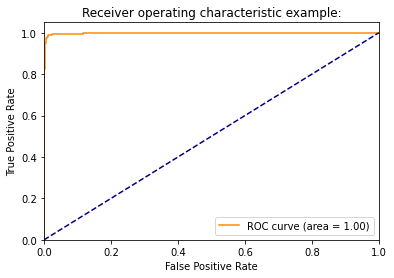



Number: 1


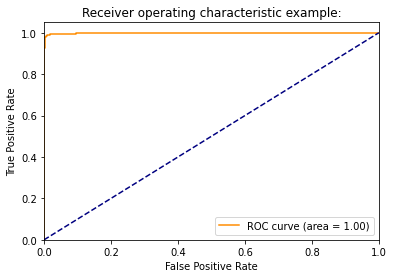



Number: 2


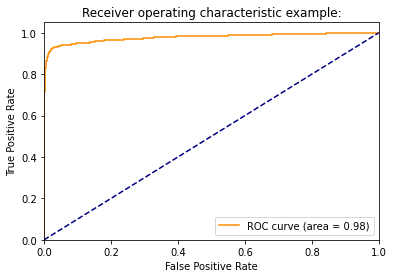



Number: 3


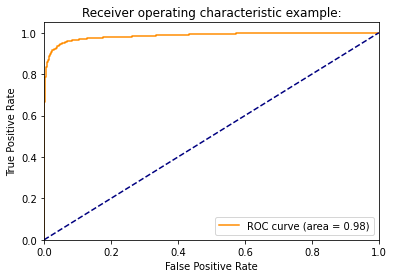



Number: 4


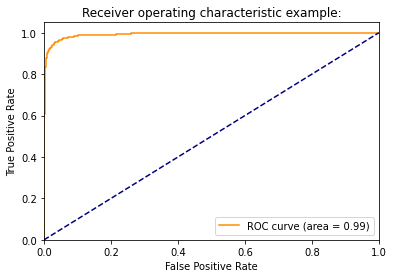



Number: 5


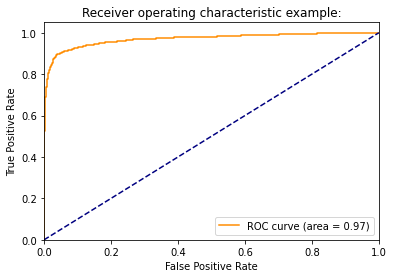



Number: 6


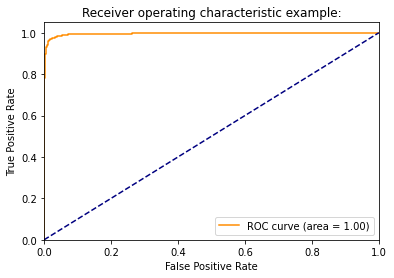



Number: 7


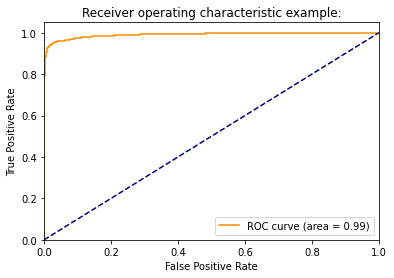



Number: 8


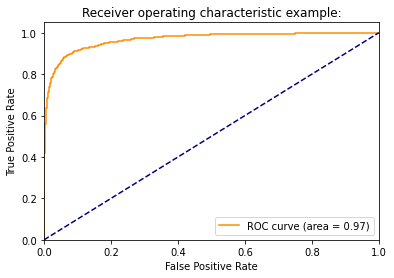



Number: 9


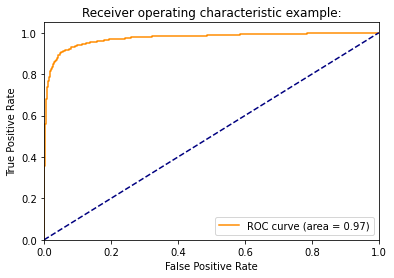

In [ ]:
n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_pred_linear_decision_function100[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
  print('roc_auc_score for SVM',i,":", roc_auc_score(y_test_b[:, i], y_pred_linear_decision_function100[:, i]))
for i in range(n_classes):
  plt.figure()
  plt.plot(fpr[i], tpr[i],color="darkorange", label='ROC curve (area = %0.2f)' % roc_auc[i])
  plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  print("\n")
  print('Number:',i)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example:')
  plt.legend(loc="lower right")
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  # This is added back by InteractiveShellApp.init_path()


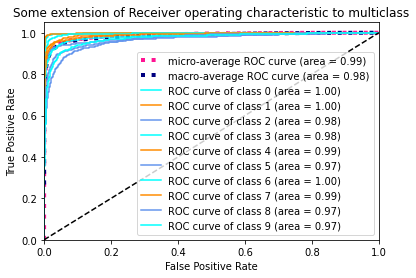

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_b.ravel(), y_pred_linear_decision_function100.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
n_classes = 10
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

### ***Decision Tree***

In [ ]:
%%time
clf100 = OneVsRestClassifier(DecisionTreeClassifier())
clf100.fit(X_train_pca100,y_train)
y_pred_tree100 = clf100.predict(X_test_pca100)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_tree100))

Accuracy: 0.7862
CPU times: user 3min 59s, sys: 442 ms, total: 3min 59s
Wall time: 4min 24s


In [ ]:
y_pred_tree_pr100 = clf100.fit(X_train_pca100,y_train).predict_proba(X_test_pca100)

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:502: RuntimeWarning: invalid value encountered in true_divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


Confusion Matrix

In [ ]:
cm_tree100 = confusion_matrix(y_test,y_pred_tree100)
print(cm_tree100)

[[ 799    2   22   20    6   18   26    8   11   68]
 [   0 1074    4    2    3    2    6    2    9   33]
 [   7    1  705   32   11   17   13   18   52  176]
 [   3    2    9  736    5   51    7   14   41  142]
 [   3    3    4    2  682   10   16   17   33  212]
 [   2    4    7   13    7  625   27    9   35  163]
 [   4    2    3    5    7   10  781   15   36   95]
 [   1    0    7    1    9    2    1  840   22  145]
 [   4    1    9   10    8   22    6    5  691  218]
 [   3    3    4    7   24   14    1   16    8  929]]


Precision

In [ ]:
precision_tree100 = precision_score(y_test, y_pred_tree100, average='weighted')
print('Precision: ',precision_tree100)

Precision:  0.8412453683189466


Recall

In [ ]:
recall_tree100 = recall_score(y_test, y_pred_tree100, average='weighted')
print('Recall: ',recall_tree100)

Recall:  0.7862


F1_score

In [ ]:
f1score_tree100 = f1_score(y_test,y_pred_tree100, average= 'weighted')
print(f1score_tree100)

0.7994823974423494


ROC

In [ ]:
df = pd.DataFrame(y_pred_tree_pr100)
df = df.fillna(0)
y_pred_tree_pr100 = df.to_numpy()

roc_auc_score for Decision Tree:  0 0.9510682610072854
roc_auc_score for Decision Tree:  1 0.9811068623577848
roc_auc_score for Decision Tree:  2 0.8939002110864469
roc_auc_score for Decision Tree:  3 0.9048110111344837
roc_auc_score for Decision Tree:  4 0.8947194996745591
roc_auc_score for Decision Tree:  5 0.8781406874358716
roc_auc_score for Decision Tree:  6 0.9363062839664031
roc_auc_score for Decision Tree:  7 0.923774256181358
roc_auc_score for Decision Tree:  8 0.8590686681551039
roc_auc_score for Decision Tree:  9 0.880659869207386


Number: 0


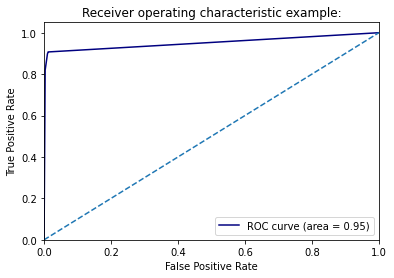



Number: 1


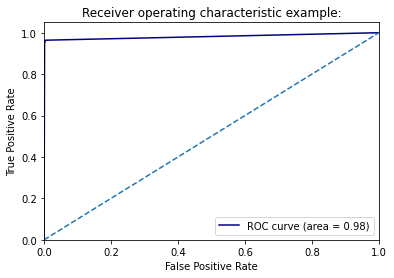



Number: 2


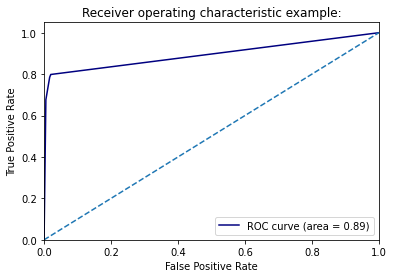



Number: 3


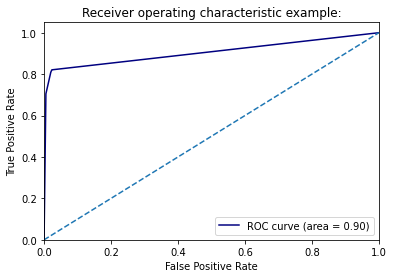



Number: 4


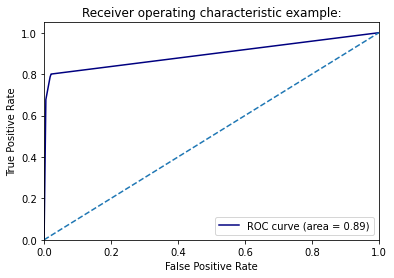



Number: 5


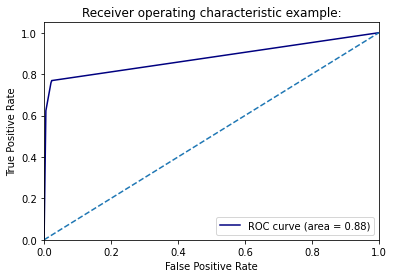



Number: 6


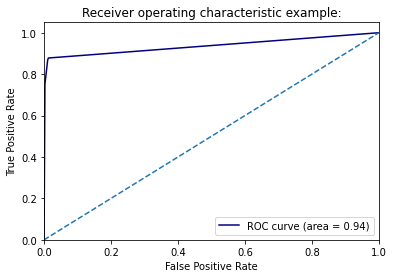



Number: 7


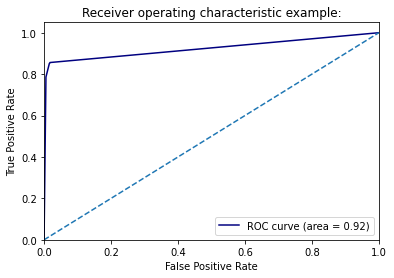



Number: 8


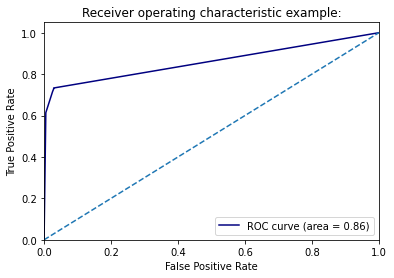



Number: 9


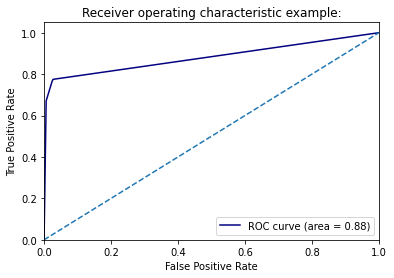

In [ ]:
n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_tree_b[:, i], y_pred_tree_pr100[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
  print('roc_auc_score for Decision Tree: ',i, roc_auc_score(y_test_tree_b[:, i], y_pred_tree_pr100[:, i]))
for i in range(n_classes):
  plt.figure()
  plt.plot(fpr[i], tpr[i],color="navy", label='ROC curve (area = %0.2f)' % roc_auc[i])
  plt.plot([0, 1], [0, 1], linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  print("\n")
  print('Number:',i)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example:')
  plt.legend(loc="lower right")
  plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  # This is added back by InteractiveShellApp.init_path()


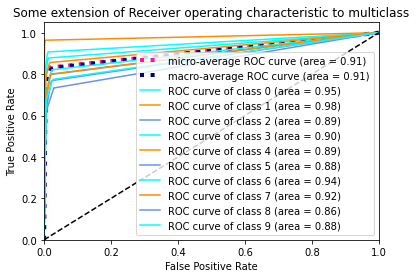

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_b.ravel(), y_pred_tree_pr100.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
n_classes = 10
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

# **cross validation**

In [ ]:
X_concat = [X_train, X_test]
y_concat = [y_train, y_test]

X = pd.concat(X_concat)
y = pd.concat(y_concat)

In [ ]:
def CrossValidation(k, X, y,model):
  kf = KFold(n_splits=k, random_state=None)
  acc_score_linear = []
  for train_index, test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]

    model.fit(X_train, y_train)
    pred_values_linear = model.predict(X_test)
    acc_linear = metrics.accuracy_score(pred_values_linear, y_test)
    acc_score_linear.append(acc_linear)
  avg_acc_score_linear = sum(acc_score_linear)/k
  print('\n\n K=',k)
  print('accuracy of each fold - {}'.format(acc_score_linear))
  print('Avg accuracy : {}'.format(avg_acc_score_linear))

## **SVM (RBF Kernel)**

In [ ]:
X_train_pca100_df = pd.DataFrame(X_train_pca100)
X_test_pca100_df = pd.DataFrame(X_test_pca100)
X_concat_100 = [X_train_pca100_df, X_test_pca100_df]
X_100 = pd.concat(X_concat_100)

In [ ]:
classifier_rbf100 = OneVsRestClassifier(SVC(kernel='rbf', random_state=1))
CrossValidation(5, X_100, y, classifier_rbf100)



 K= 5
accuracy of each fold - [0.9842142857142857, 0.9834285714285714, 0.9825, 0.9792142857142857, 0.9855]
Avg accuracy : 0.9829714285714285


In [ ]:
classifier_rbf100 = OneVsRestClassifier(SVC(kernel='rbf', random_state=1))
CrossValidation(7, X_100, y, classifier_rbf100)



 K= 7
accuracy of each fold - [0.9838, 0.9851, 0.982, 0.9838, 0.9779, 0.9845, 0.9844]
Avg accuracy : 0.9830714285714285


In [ ]:
classifier_rbf100 = OneVsRestClassifier(SVC(kernel='rbf', random_state=1))
CrossValidation(10, X_100, y, classifier_rbf100)



 K= 10
accuracy of each fold - [0.9855714285714285, 0.9842857142857143, 0.9851428571428571, 0.9822857142857143, 0.9837142857142858, 0.9827142857142858, 0.9792857142857143, 0.9794285714285714, 0.9851428571428571, 0.988]
Avg accuracy : 0.9835571428571429


## **SVM (Linear Kernel)**

In [ ]:
#SVM --> Kernel = Linear
model_SVM_linear = OneVsRestClassifier(make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5)))
CrossValidation(5, X, y, model_SVM_linear)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number



 K= 5
accuracy of each fold - [0.9045714285714286, 0.9049285714285714, 0.9006428571428572, 0.9015714285714286, 0.9176428571428571]
Avg accuracy : 0.9058714285714287


In [ ]:
#SVM --> Kernel = Linear --> k=7
model_SVM_linear = OneVsRestClassifier(make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5)))
CrossValidation(7, X, y, model_SVM_linear)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number



 K= 7
accuracy of each fold - [0.9056, 0.9035, 0.9072, 0.8982, 0.8962, 0.9135, 0.9137]
Avg accuracy : 0.9054142857142856


In [ ]:
#SVM --> Kernel = Linear --> k=10
model_SVM_linear = OneVsRestClassifier(make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5)))
CrossValidation(10, X, y, model_SVM_linear)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number



 K= 10
accuracy of each fold - [0.9095714285714286, 0.9008571428571429, 0.901, 0.9112857142857143, 0.8958571428571429, 0.9017142857142857, 0.8987142857142857, 0.9028571428571428, 0.9077142857142857, 0.9207142857142857]
Avg accuracy : 0.9050285714285715


## **Decision Tree**

In [ ]:
#DecisionTree --> k=5
model_DecisionTree = OneVsRestClassifier(DecisionTreeClassifier())
CrossValidation(5, X, y, model_DecisionTree)



 K= 5
accuracy of each fold - [0.8452142857142857, 0.8488571428571429, 0.8428571428571429, 0.8432142857142857, 0.8618571428571429]
Avg accuracy : 0.8484


In [ ]:
#DecisionTree --> k=7
model_DecisionTree = OneVsRestClassifier(DecisionTreeClassifier())
CrossValidation(7, X, y, model_DecisionTree)



 K= 7
accuracy of each fold - [0.8487, 0.8459, 0.8498, 0.8395, 0.8454, 0.8587, 0.8535]
Avg accuracy : 0.8487857142857144


In [ ]:
#DecisionTree --> k=10
model_DecisionTree = OneVsRestClassifier(DecisionTreeClassifier())
CrossValidation(10, X, y, model_DecisionTree)



 K= 10
accuracy of each fold - [0.852, 0.8464285714285714, 0.8527142857142858, 0.8541428571428571, 0.8455714285714285, 0.8441428571428572, 0.8434285714285714, 0.847, 0.852, 0.8695714285714286]
Avg accuracy : 0.8507
